# aside_EDA_exploration_01overAll.IPyNb
- 전체 데이터 기본적인 성향 둘러보기

### 1.0 gdrive 마운트 / Import + 함수정의
- 코드를 사용해서 모듈 import 로 마운트 하거나
- 코랩 폴더에서 드라이브 마운트 클릭 하거나

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

In [3]:
# 데이터가 많아 5분 정도 걸립니다.
dir_base = '/home/yk/0325_Starcraft/competition/'

raw      = 'c03_starcraft_prediction/data_raw/'
remake   = 'c03_starcraft_prediction/data_remake/'
submit   = 'c03_starcraft_prediction/data_submit/'

### 사용함수의 정의

In [4]:
os.chdir(dir_base)
from _assets.modules import *


# OS 화일 및 DF 정보조회를 위한 탐색 모듈



### 플롯 간단 테스트

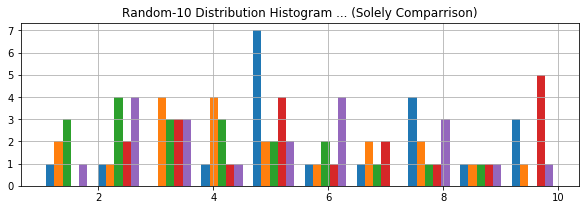

In [5]:
_s = get_random_n_array(5)
hist_it(_s, 1,1, figsize=(10,3), overlap=False, title='Random-10 Distribution Histogram')

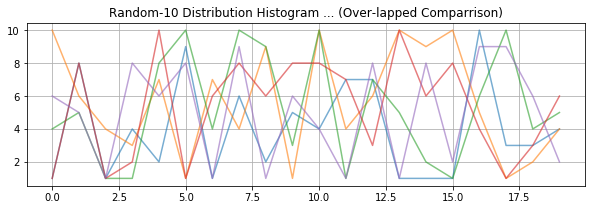

In [6]:
_s = get_random_n_array(5)
plot_it(_s, 1,1, figsize=(10,3), overlap=True, title='Random-10 Distribution Histogram')

## 2.0 Train Data Set 불러오기

| 컬럼명  | 값    | type     | 설명                  | 비고   |
|:-------:|:------|----------|-----------------------|--------|
| game_id |33781  |int       |경기 구분 기호         | unique (multiple) 
| winner  |0.6523 |float     |player-1 승리확률      | 0.6287
| time    |2.24   |float     |경기시간 (60분법 구분) | 2분24초
| player  |0      |int       |player 0 - 첫번째 선수 
|         |1      |int       |player 1 - 두번째 선수          
| species |T      |Object    |테란 (Terran)    |     
|         |P      |Object    |프로토스 (Protos)|      
|         |Z      |Object    |저그 (Zerg)      |      
| event   |Ability           |Object |생산, 공격 등 선수의 주요 행동
|         |AddToControlGroup |Object |부대에 추가
|         |Camera            |Object |시점 선택
|         |ControlGroup      |Object |부대 행동
|         |GetControlGroup   |Object |부대 불러오기
|         |Right             |Object |Click : 마우스 우클릭
|         |Selection         |Object |객체 선택
|         |SetControlGroup   |Object |부대 지정
|event_contents|@(좌표, 등)  | object|이벤트에 관한 상세설명 


 

In [7]:
%%time
df_train = pd.read_csv(dir_base + raw + 'train.csv')

CPU times: user 42.4 s, sys: 3.89 s, total: 46.3 s
Wall time: 43.4 s


In [8]:
show_infoDF_from(df_train)

*** DATA SHAPE = [ 67,091,776 x 7 ]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67091776 entries, 0 to 67091775
Data columns (total 7 columns):
game_id           int64
winner            int64
time              float64
player            int64
species           object
event             object
event_contents    object
dtypes: float64(1), int64(3), object(3)
memory usage: 3.5+ GB
None

            game_id        winner          time        player
count  6.709178e+07  6.709178e+07  6.709178e+07  6.709178e+07
mean   1.944981e+04  5.012076e-01  4.277912e+00  4.992699e-01
std    1.122980e+04  4.999985e-01  2.709741e+00  4.999995e-01
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    9.718000e+03  0.000000e+00  2.120000e+00  0.000000e+00
50%    1.948500e+04  1.000000e+00  4.150000e+00  0.000000e+00
75%    2.919700e+04  1.000000e+00  6.360000e+00  1.000000e+00
max    3.887100e+04  1.000000e+00  1.059000e+01  1.000000e+00



In [9]:
df_train.shape         # (67091776, 7)
df_train.head(60)

,game_id,winner,time,player,species,event,event_contents
0,0,1,0.00,0,T,Camera,"at (145.25, 21.5078125)"
1,0,1,0.00,1,T,Camera,"at (22.75, 147.0078125)"
2,0,1,0.02,0,T,Selection,['OrbitalCommand [3080001]']
3,0,1,0.02,0,T,Ability,(1360) - TrainSCV
4,0,1,0.14,0,T,Camera,"at (142.99609375, 24.50390625)"
5,0,1,0.14,0,T,Camera,"at (142.5078125, 24.98828125)"
6,0,1,0.14,0,T,Camera,"at (139.6171875, 27.8828125)"
7,0,1,0.14,0,T,Camera,"at (138.3359375, 29.1640625)"
8,0,1,0.14,0,T,Camera,"at (136.23828125, 31.26171875)"
9,0,1,0.14,0,T,Camera,"at (135.23828125, 32.26171875)"


In [10]:
# 이벤트 콤포넌트(디테일)을 분석하기 위해 종류 추출
event_detail_count = df_train['event_contents'].value_counts()

In [11]:
len(event_detail_count)  # 35,524,115  ... 360개가 아닌데? 어떻게 분류했지?
event_detail_count.head(10)

[]                        811772
(1360) - TrainSCV         350376
(1820) - MorphDrone       287254
(15E0) - TrainProbe       258765
(13E0) - TrainMarine      134801
(1822) - MorphOverlord     90700
at (143.5, 22.7578125)     89727
at (24.5, 145.7578125)     88246
(1821) - MorphZergling     83416
at (0.0, 0.0)              82567
Name: event_contents, dtype: int64

In [12]:
event_detail_count.describe()    # pandas.core.series.Series

count    3.552412e+07
mean     1.591027e+00
std      1.767747e+02
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      8.117720e+05
Name: event_contents, dtype: float64

In [13]:
# 종족별 - 이벤트 콤포넌트(디테일)을 추출!
event_detail_count_TERRAN = df_train['event_contents'][df_train['species'] == 'T'].value_counts()
event_detail_count_PROTOZ = df_train['event_contents'][df_train['species'] == 'P'].value_counts()
event_detail_count_ZERG = df_train['event_contents'][df_train['species'] == 'Z'].value_counts()

In [14]:
# 조작 복잡도는 T > Z > P 순이다 ... 프로토스가 제일 조작단순
print("T = {:,} ".format(len(event_detail_count_TERRAN)))      # 15,444,663
print("Z = {:,} ".format(len(event_detail_count_ZERG))  )      # 11,266,497
print("P = {:,} ".format(len(event_detail_count_PROTOZ)))      # 10,455,219

T = 15,444,663 
Z = 11,266,497 
P = 10,455,219 


In [15]:
# 조작 복잡도는 T > Z > P 순이다 ... 프로토스가 제일 조작단순
print("--- EventDetail of T ----\n", event_detail_count_TERRAN.head(5), end="\n\n")    # 15,444,663
print("--- EventDetail of Z ----\n", event_detail_count_ZERG.head(5), end="\n\n")      # 11,266,497
print("--- EventDetail of P ----\n", event_detail_count_PROTOZ.head(5), end="\n\n")    # 10,455,219

--- EventDetail of T ----
 (1360) - TrainSCV               350376
[]                              317596
(13E0) - TrainMarine            134801
['OrbitalCommand [3100001]']     75127
['OrbitalCommand [3440001]']     52389
Name: event_contents, dtype: int64

--- EventDetail of Z ----
 []                        351274
(1820) - MorphDrone       287254
(1822) - MorphOverlord     90700
(1821) - MorphZergling     83416
(1E60) - TrainQueen        51130
Name: event_contents, dtype: int64

--- EventDetail of P ----
 (15E0) - TrainProbe    258765
[]                     142902
['Nexus [3100001]']     55891
['Nexus [3440001]']     38766
at (0.0, 0.0)           20809
Name: event_contents, dtype: int64



In [16]:
# 널값을 발생시키는 이벤트를 카운트 한다. -- 모두 공격 Activity
df_train['event'][df_train['event_contents'].isna()].value_counts()

GetControlGroup      10051180
SetControlGroup        340704
AddToControlGroup      149340
ControlGroup            30719
Name: event, dtype: int64

In [17]:
df_train['event_contents'][df_train['event_contents'] == 'GetControlGroup'].value_counts()

Series([], Name: event_contents, dtype: int64)

In [18]:
df_train['event_contents'][df_train['event_contents'] == 'SetControlGroup'].value_counts()

Series([], Name: event_contents, dtype: int64)

In [19]:
df_train['event_contents'][df_train['event_contents'] == 'AddToControlGroup'].value_counts()

Series([], Name: event_contents, dtype: int64)

In [20]:
df_train['event_contents'][df_train['event_contents'] == 'ControlGroup'].value_counts()

Series([], Name: event_contents, dtype: int64)

## 3.0 플롯(Plot) 시리즈 Array 함수 작성
- 플레이어별, 종족별 'Camera' 이벤트 발생횟수를 카운트 해서 비교 해 본다.
- 조건부로 추출된 시리즈 Array를 작성 = 데이터가 많아서 시간이 걸린다.

In [21]:
%%time
# 테란(T)의 액티비티 확인해 보기
_p1_t = df_train['time'][
            (df_train['player'] == 0) &
            (df_train['species'] == 'T') &
            (df_train['event'] == 'Camera')
        ]

_p2_t = df_train['time'][
            (df_train['player'] == 1) &
            (df_train['species'] == 'T') &
            (df_train['event'] == 'Camera')
        ]

# 프로토스(P)의 액티비티 확인해 보기
_p1_p = df_train['time'][
            (df_train['player'] == 0) &
            (df_train['species'] == 'P') &
            (df_train['event'] == 'Camera')
        ]

_p2_p = df_train['time'][
            (df_train['player'] == 1) &
            (df_train['species'] == 'P') &
            (df_train['event'] == 'Camera')
        ]

# 저그(Z)의 액티비티 확인해 보기
_p1_z = df_train['time'][
            (df_train['player'] == 0) &
            (df_train['species'] == 'Z') &
            (df_train['event'] == 'Camera')
        ]

_p2_z = df_train['time'][
            (df_train['player'] == 1) &
            (df_train['species'] == 'Z') &
            (df_train['event'] == 'Camera')
        ]

CPU times: user 52 s, sys: 863 ms, total: 52.9 s
Wall time: 33.6 s


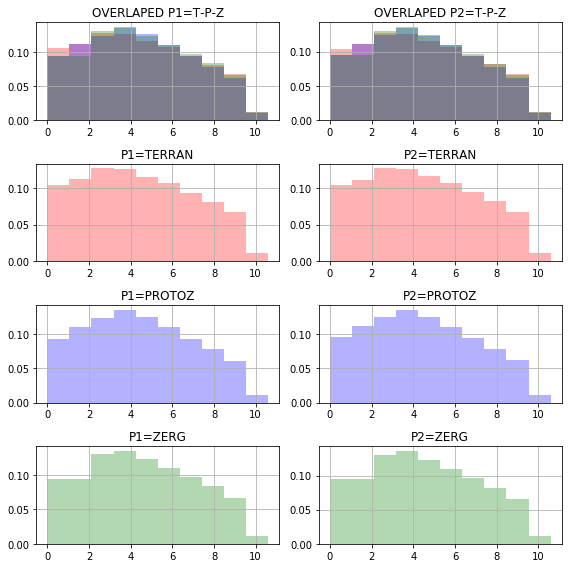

In [22]:
fig, axes = plt.subplots(*(4,2), figsize=(8,8))

histit(axes, _p1_t, 1, 1,'Red')
histit(axes, _p1_p, 1, 1,'Blue')
histit(axes, _p1_z, 1, 1,'Green', 'OVERLAPED P1=T-P-Z') # 오버랩되는것은 맨 마지막에..

histit(axes, _p2_t, 1, 2,'Red')
histit(axes, _p2_p, 1, 2,'Blue')
histit(axes, _p2_z, 1, 2,'Green', 'OVERLAPED P2=T-P-Z') # 오버랩되는것은 맨 마지막에..

histit(axes, _p1_t, 2, 1,'Red'  , 'P1=TERRAN')
histit(axes, _p1_p, 3, 1,'Blue' , 'P1=PROTOZ')
histit(axes, _p1_z, 4, 1,'Green', 'P1=ZERG')
histit(axes, _p2_t, 2, 2,'Red'  , 'P2=TERRAN')
histit(axes, _p2_p, 3, 2,'Blue' , 'P2=PROTOZ')
histit(axes, _p2_z, 4, 2,'Green', 'P2=ZERG')

fig.tight_layout()

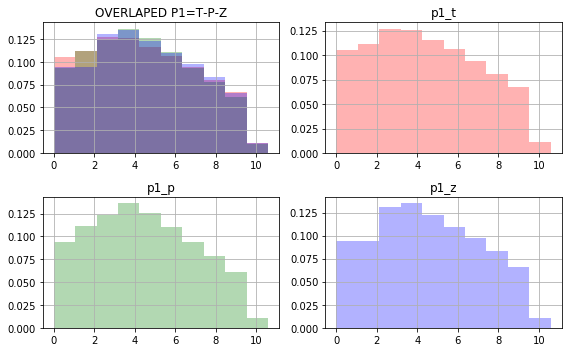

In [23]:
fig, axes = plt.subplots(*(2,2), figsize=(8,5))
histit(axes, _p1_t, 1, 1,'Red'  ,' ')
histit(axes, _p1_p, 1, 1,'Green',' ')
histit(axes, _p1_z, 1, 1,'Blue' ,'OVERLAPED P1=T-P-Z')

histit(axes, _p1_t, 1, 2,'Red'  ,'p1_t')
histit(axes, _p1_p, 2, 1,'Green','p1_p')
histit(axes, _p1_z, 2, 2,'Blue' ,'p1_z')

fig.tight_layout()

### 각 종족별 2~4분 대 (2분간) 에서 'Camera' 이벤트 최대
- 종족별 약간의 차이가 있음
- T,Z는 비숫, P는 PEAK 형상

## 3.0 Train 데이터를 불러온다
- 학습데이터는 용량이 커서 불러오는데 시간이 좀 걸린다.
- 67,091,775 개의 38,871개의 경기데이터
- 경기당 대략, 약 1,730 개의 이벤트가 발생한다.
- 플레이어 당 약 863번의 이벤트를 발생시킨다.
- 최대경기 시간은 약 10분, 최빈 경기시간은 8분

In [24]:
%%time
# 각 경기별 총 소요시간을 계산해서 np.array에 저장한다..
# 6,800 만개라서 시간이 너무 오래 걸린다.

time_spends = []
total_game_id = df_train['game_id'].max()      # 38871

for game_id in range(total_game_id): 
    time_spend = df_train['time'][df_train['game_id'] == game_id].max()
    time_spends.append([game_id, time_spend])

np_time_spends = np.array(time_spends)

CPU times: user 1h 3min 54s, sys: 118 ms, total: 1h 3min 54s
Wall time: 1h 3min 57s


In [25]:
df_time = pd.DataFrame(np_time_spends, columns=['game_id', 'time'])
df_time['game_id'] = df_time['game_id'].astype(int)

In [26]:
df_time.shape   # (38871, 2)
df_time.head()

,game_id,time
0,0,7.24
1,1,9.59
2,2,9.59
3,3,9.59
4,4,5.43


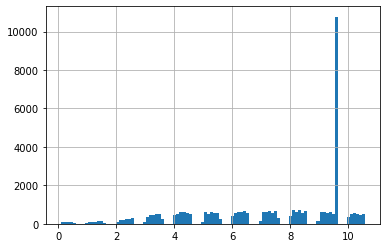

In [27]:
plt.hist(df_time['time'], bins=100)
plt.grid()
plt.show()

In [28]:
len(df_time['time'].value_counts())    # 652 개
df_time['time'].value_counts()    # 652 개

9.59    9266
9.58    1108
9.57     161
9.56      93
7.13      92
        ... 
0.08       2
0.11       2
0.09       1
0.10       1
0.33       1
Name: time, Length: 652, dtype: int64

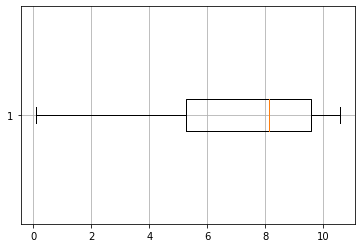

In [29]:
plt.boxplot(df_time['time'], vert=False)
plt.grid()
plt.show()

In [30]:
df_time['time'].describe()

count    38871.000000
mean         7.289334
std          2.590129
min          0.080000
25%          5.270000
50%          8.140000
75%          9.590000
max         10.590000
Name: time, dtype: float64

In [31]:
df_time['time'].quantile(0.10)

3.38

In [32]:
df_time['time'].quantile(0.05)

2.44

In [33]:
df_time['time'].quantile(0.03)

2.09

In [34]:
df_time['time'].quantile(0.02)

1.4

In [35]:
# 플롯 비교를 위한 딕셔너리 작성
_h = {
        '1' : df_train['time'],                             # 전체 시간 카운트
    
        '2' : df_train['time'][df_train['player'] == 0],    # Player=0 의 이벤트 타임
        '3' : df_train['time'][df_train['player'] == 1],    # Player=1 의 이벤트 타임
    
    
        '4' : df_train['time'][                             # 카메라 이벤트 타임, 7분 이상
                    (df_train['event'] == 'Camera') & 
                    (df_train['time'] <= 4.0) &
                    (df_train['time'] >= 2.0) 
                ],    
        '5' : df_train['time'][                             # Player=0 의  카메라 이벤트 타임, 7분 이상
                    (df_train['event'] == 'Camera') &
                    (df_train['player'] == 0) &
                    (df_train['time'] <= 4.0) &
                    (df_train['time'] >= 2.0) 
                ],    
        '6' : df_train['time'][                             # Player=0 의  카메라 이벤트 타임, 7분 이상
                    (df_train['event'] == 'Camera') &
                    (df_train['player'] == 1) &
                    (df_train['time'] <= 4.0) &
                    (df_train['time'] >= 2.0) 
                ],    
    }

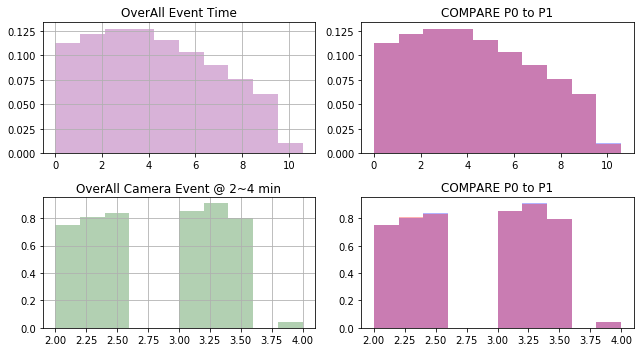

In [36]:
fig, axes = plt.subplots(*(2,2), figsize=(9,5))

histit(axes, _h['1'], 1, 1,'Purple', 'OverAll Event Time')

histit(axes, _h['2'], 1, 2,'Blue')
histit(axes, _h['3'], 1, 2,'Red', 'COMPARE P0 to P1') # 오버랩은 맨 마지막에..

histit(axes, _h['4'], 2, 1,'DarkGreen', 'OverAll Camera Event @ 2~4 min')
histit(axes, _h['5'], 2, 2,'Blue',)
histit(axes, _h['6'], 2, 2,'Red', 'COMPARE P0 to P1') # 오버랩은 맨 마지막에..

fig.tight_layout()

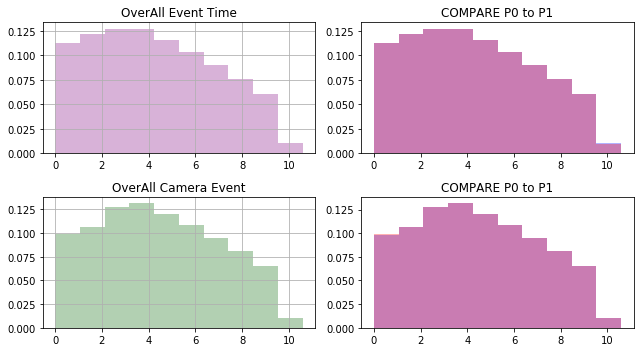

In [37]:
# 플롯 비교를 위한 딕셔너리 작성
_h = {
        '1' : df_train['time'],                             # 전체 시간 카운트
    
        '2' : df_train['time'][df_train['player'] == 0],    # Player=0 의 이벤트 타임
        '3' : df_train['time'][df_train['player'] == 1],    # Player=1 의 이벤트 타임
    
    
        '4' : df_train['time'][                             # 카메라 이벤트 타임, 7분 이상
                    (df_train['event'] == 'Camera')
                ],    
        '5' : df_train['time'][                             # Player=0 의  카메라 이벤트 타임, 7분 이상
                    (df_train['event'] == 'Camera') &
                    (df_train['player'] == 0)
                ],    
        '6' : df_train['time'][                             # Player=0 의  카메라 이벤트 타임, 7분 이상
                    (df_train['event'] == 'Camera') &
                    (df_train['player'] == 1)
                ],    
    }

fig, axes = plt.subplots(*(2,2), figsize=(9,5))

histit(axes, _h['1'], 1, 1,'Purple', 'OverAll Event Time')
histit(axes, _h['2'], 1, 2,'Blue')
histit(axes, _h['3'], 1, 2,'Red', 'COMPARE P0 to P1') # 오버랩은 맨마지막..

histit(axes, _h['4'], 2, 1,'DarkGreen', 'OverAll Camera Event')
histit(axes, _h['5'], 2, 2,'Blue',)
histit(axes, _h['6'], 2, 2,'Red', 'COMPARE P0 to P1') # 오버랩은 맨마지막..

fig.tight_layout()